In [3]:
# Import numpy for math operations and containers.
# Import matplotlib.pyplot for visual plotting.

import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Define training data.

                       # [age, height cm]
trainingFeatures = np.array([[5, 50],
                            [10, 50],
                            [15, 50],
                            [20, 50],
                            [25, 50],
                            [10, 100],
                            [10, 150],
                            [10, 175],
                            [10, 200],
                            [15, 100],
                            [15, 150],
                            [15, 175],
                            [15, 200],
                            [17, 100],
                            [17, 125],
                            [17, 150],
                            [17, 175],
                            [17, 200],
                            [20, 50],
                            [20, 100],
                            [20, 150],
                            [20, 175],
                            [20, 200],
                            [22, 125],
                            [25, 50],
                            [25, 100],
                            [25, 175],
                            [25, 200]])

                     # [bIsManly]
trainingResults = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1])

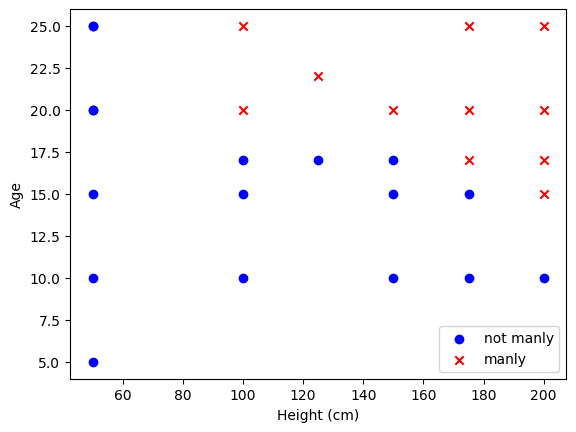

In [10]:
# Scatter plot the training data.

group0 = trainingFeatures[trainingResults == 0]
group1 = trainingFeatures[trainingResults == 1]

plt.scatter(group0[:, 1], group0[:, 0], c='b', marker='o', label='not manly')
plt.scatter(group1[:, 1], group1[:, 0], c='r', marker='x', label='manly')

plt.ylabel('Age')
plt.xlabel('Height (cm)')
plt.legend(loc='lower right')

plt.show()

In [15]:
# Define sigmoid function.

def sigmoid(z):
    # input :
    # z [scalar] - Parameter for the sigmoid function.
    # returns :
    # [scalar] - Result of sigmoid function.
    
    return 1 / (1 + np.exp(-1 * z))

In [18]:
# Test the sigmoid.

print(f'{sigmoid(0)}')
print(f'{sigmoid(1)}')
print(f'{sigmoid(-1)}')
print(f'{sigmoid(0.5)}')
print(f'{sigmoid(2)}')
print(f'{sigmoid(-2)}')
print(f'{sigmoid(5555)}')
print(f'{sigmoid(-5555)}')

0.5
0.7310585786300049
0.2689414213699951
0.6224593312018546
0.8807970779778823
0.11920292202211755
1.0
0.0


In [26]:
# Define prediction function.

def predict(X, w, b):
    # input :
    # X [ndarray : Shape(m,)] - Data with m features to predict result for.
    # w [ndarray : Shape(m,)] - Weights with m values required for proper prediction.
    # b [scalar] - Bias required for proper prediction.
    # returns:
    # [scalar] - Predicted outcome (1 - true, 0 - false).
    
    dotPlusb = np.dot(X, w) + b
    pred = sigmoid(dotPlusb)
    
    return pred

In [27]:
# Test prediciton with some random weights and bias.

print(f'{predict([19, 177], [0.888, 0.111], 1.5)}')
print(f'{predict([10, 122], [0.888, 0.111], 1.5)}')

1.0
0.9999999999591862


In [28]:
# Define loss function.

def loss(x, w, b, y):
    # input :
    # x [ndarray : Shape(m,)] - Data with m features to predict loss for.
    # w [ndarray : Shape(m,)] - Weights with m values used in finding loss for this given x data.
    # b [scalar] - Bias used in finding loss for this given x data.
    # y [scalar] - Proper result needed for calculating loss for given x.
    # returns:
    # [scalar] - Amount of loss for given x with given w and b.
    
    return (-1 * y * np.log(predict(x, w, b))) - ((1 - y) * np.log(1 - predict(x, w, b)))

In [29]:
# Test loss with some random weights and bias.

print(f'{loss([20, 200], [0.888, 0.111], 1.5, 1.0)}')

nan


In [32]:
# Define cost function.
# It's just a sum of losses divided by number of training examples.
# It's goal is to find how bad are the given weights and bias.

def compute_cost(X, w, b, Y):
    # input :
    # X [ndarray : Shape(m,n)] - Training data.
    # w [ndarray : Shape(n,)] - Weights for n features.
    # b [scalar] - Bias.
    # Y [ndarray : Shape(m)] - Results for the training data.
    # returns:
    # [scalar] - Cost for given weights and bias.
    
    # Get number of examples.
    m = X.shape[0]
    cost = 0
    
    for i in range(m):
        cost += loss(X[i], w, b, Y[i])
        
    cost /= m
    
    return cost

In [34]:
# Test cost with some random weights and bias.

print(f'{compute_cost(trainingFeatures, [0.5, 0.5], 2.5, trainingResults)}')

nan


In [42]:
# Define gradient computation.

def compute_gradient(X, w, b, Y):
    # input:
    # X [ndarray : Shape(m,n)] - Training data.
    # w [ndarray : Shape(n,)] - Weights for n features.
    # b [scalar] - Bias.
    # Y [ndarray : Shape(m)] - Results for the training data.
    # returns: 
    # dj_dw [ndarray : Shape(n,)] - Gradient of current weights.
    # dj_db [scalar] - Gradient of current bias.
    
    # Get the shape of training data.
    m,n = X.shape
    
    # Init n weights with zeros.
    dj_dw = np.zeros((n,))
    
    # Init bias with 0.
    dj_db = 0
    
    # Loop over all examples.
    for i in range(m):
        
        err = predict(X[i], w, b) - Y[i]
        
        # Loop over all features.
        for j in range(n):
            dj_dw[j] += err * X[i, j]
            
        dj_db += err
        
    dj_dw /= m
    dj_db /= m
    
    return dj_dw, dj_db
    

In [43]:
# Test single gradient with some random weights and bias.

print(f'{compute_gradient(trainingFeatures, [0.5, 0.5], 2.5, trainingResults)}')

(array([ 9.14285714, 63.39285714]), 0.6071428571428534)


In [55]:
# Define training function.

def train_logistic_regression(X, Y, w_start, b_start, alpha, num_iter):
    # inputs:
    # X [ndarray : Shape(m,n)] - Training data.
    # Y [ndarray : Shape(m)] - Results for the training data.
    # w_start [ndarray : Shape(n,)] - Starting weights.
    # b_start [scalar] - Starting bias.
    # alpha [scalar] - Step size.
    # num_iter [scalar] - Number of iterations.
    # returns:
    # weights [ndarray : Shape(n,)] - Trained weights for n-features.
    # bias [scalar] - Trained bias.
    # cost_history [ndarray : Shape(num_iter,)] - History of cost during training.
    
    weights = w_start
    bias = b_start
    cost_history = np.zeros((num_iter,))
    
    for i in range(num_iter):
        dj_dw, dj_db = compute_gradient(X, weights, bias, Y)
        
        weights -= alpha * dj_dw
        bias -= alpha * dj_db
        cost_history[i] = compute_cost(X, weights, bias, Y)
        
        if(i % 100 == 0):
            print(f'Cost at iteration {i} : {cost_history[i]}')
    
    return weights, bias, cost_history
    

In [93]:
# Do the training.

trained_weights, trained_bias, cost_history = train_logistic_regression(trainingFeatures, trainingResults, [0.5, 0.5], 1.0, 0.0002, 2000)

print(f'found weights: {trained_weights}, found bias: {trained_bias}')

Cost at iteration 0 : nan
Cost at iteration 100 : 1.9295470366444383
Cost at iteration 200 : 1.676078234424207
Cost at iteration 300 : 1.4422356885229706
Cost at iteration 400 : 1.2357014807899227
Cost at iteration 500 : 1.0659644484084572
Cost at iteration 600 : 0.9412337681967146
Cost at iteration 700 : 0.8619881998794322
Cost at iteration 800 : 0.8182346576749179
Cost at iteration 900 : 0.7962150641613809
Cost at iteration 1000 : 0.7855453904727714
Cost at iteration 1100 : 0.7803750708790514
Cost at iteration 1200 : 0.7778064495526242
Cost at iteration 1300 : 0.7764670974086901
Cost at iteration 1400 : 0.7757122831039894
Cost at iteration 1500 : 0.7752376084504143
Cost at iteration 1600 : 0.7748981479770941
Cost at iteration 1700 : 0.7746243413405862
Cost at iteration 1800 : 0.7743825771278603
Cost at iteration 1900 : 0.7741565301457285
found weights: [-0.06458809  0.00123946], found bias: 0.9375286289980646


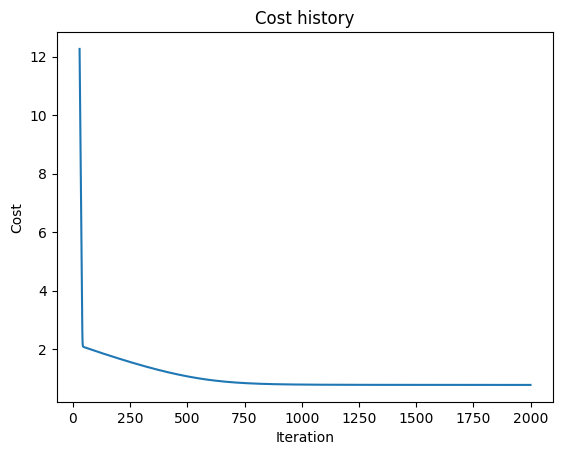

In [94]:
# Plot the cost history.

x = np.arange(cost_history.shape[0])

plt.plot(x, cost_history)

plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost history')

plt.show()

In [109]:
# Predict results for training data.

m = trainingFeatures.shape[0]
predictions = np.zeros((m,))

for i in range(m):
    predictions[i] = predict(trainingFeatures[i], trained_weights, trained_bias)
    print(f'prediction for age ({trainingFeatures[i,0]}) and height ({trainingFeatures[i,1]}cm) : {predictions[i]}')    



prediction for age (5) and height (50cm) : 0.662970761149623
prediction for age (10) and height (50cm) : 0.5874953282413128
prediction for age (15) and height (50cm) : 0.5076694799424877
prediction for age (20) and height (50cm) : 0.427450644818405
prediction for age (25) and height (50cm) : 0.3508737974381187
prediction for age (10) and height (100cm) : 0.6024283985120582
prediction for age (10) and height (150cm) : 0.6171731403602843
prediction for age (10) and height (175cm) : 0.6244672686534072
prediction for age (10) and height (200cm) : 0.6317053535113822
prediction for age (15) and height (100cm) : 0.5231467768477757
prediction for age (15) and height (150cm) : 0.5385797479206632
prediction for age (15) and height (175cm) : 0.5462704444210053
prediction for age (15) and height (200cm) : 0.5539391210392061
prediction for age (17) and height (100cm) : 0.49087030453216235
prediction for age (17) and height (125cm) : 0.49861591915783915
prediction for age (17) and height (150cm) : 0

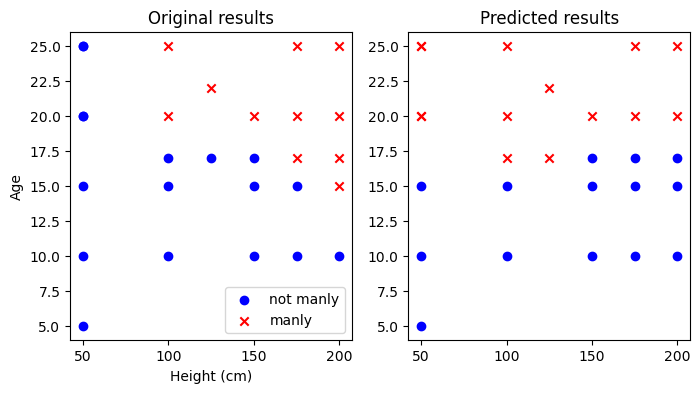

In [121]:
# Scatter original data and predictions next to each other.

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# Scatter plot the training data.

group0 = trainingFeatures[trainingResults == 0]
group1 = trainingFeatures[trainingResults == 1]

axs[0].scatter(group0[:, 1], group0[:, 0], c='b', marker='o', label='not manly')
axs[0].scatter(group1[:, 1], group1[:, 0], c='r', marker='x', label='manly')

axs[0].set_ylabel('Age')
axs[0].set_xlabel('Height (cm)')
axs[0].legend(loc='lower right')
axs[0].set_title('Original results')

# Scatter plot the predicted results.

group0 = trainingFeatures[predictions >= 0.5]
group1 = trainingFeatures[predictions < 0.5]

axs[1].scatter(group0[:, 1], group0[:, 0], c='b', marker='o', label='not manly')
axs[1].scatter(group1[:, 1], group1[:, 0], c='r', marker='x', label='manly')

axs[1].set_title('Predicted results')

plt.show()

In [123]:
# We can clearly see there's something wrong with the prediction. This needs improving.
# First lets figure out how to properly draw a decision boundary here.